In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts
from statsmodels.iolib.summary2 import summary_col

### STARGAZER ###

from stargazer.stargazer import Stargazer, LineLocation

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df["nzbtuusd_r"] = (df["NZBTU_USD"].pct_change())
df = df.dropna()
print(df)

         DATE  Price_NZ    NZ_BTU  NZ_USD_Q  NZBTU_USD        HH    NBP_raw  \
40 2009-03-01  6.739482  7.110531  0.538933   3.832102  3.993333  38.930000   
41 2009-06-01  7.067294  7.456390  0.626667   4.672671  3.670000  30.123125   
42 2009-09-01  6.931729  7.313362  0.705367   5.158602  3.380000  26.784030   
43 2009-12-01  6.880381  7.259187  0.724933   5.262427  4.946667  31.911429   
44 2010-03-01  7.198392  7.594707  0.704300   5.348952  4.546667  36.481774   
45 2010-06-01  6.402182  6.754661  0.701033   4.735242  4.523333  38.841077   
46 2010-09-01  7.423850  7.832577  0.730467   5.721436  3.880000  42.119118   
47 2010-12-01  7.609725  8.028686  0.762800   6.124282  4.150000  47.904615   
48 2011-03-01  7.300203  7.702123  0.763000   5.876720  4.100000  57.787302   
49 2011-06-01  7.201765  7.598266  0.818767   6.221207  4.423333  58.159531   
50 2011-09-01  7.321425  7.724513  0.813533   6.284149  3.843333  57.948806   
51 2011-12-01  6.270751  6.615994  0.781067   5.1675

In [ ]:
mod = sm.tsa.MarkovRegression(df["nzbtuusd_r"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

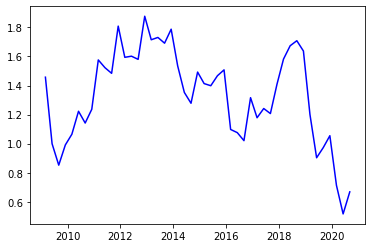

In [3]:
df['ratio'] = df["NBP_USD"]/df["NZBTU_USD"]
plt.plot(df['DATE'],df['ratio'],color='blue')

In [4]:
mod = sm.tsa.MarkovRegression(df["ratio"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/regime_switching/markov_regression.py:188: RuntimeWarning: divide by zero encountered in true_divide
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/regime_switching/markov_regression.py:188: RuntimeWarning: invalid value encountered in true_divide
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/regime_switching/markov_regression.py:188: RuntimeWarning: divide by zero encountered in log
  -0.5 * resid**2 / variance - 0.5 * np.log(2 * np.pi * variance))
/Users/joe/opt/anaconda3/lib/python3.8/site-package

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   47
Model:               MarkovRegression   Log Likelihood                     nan
Date:                Sat, 26 Mar 2022   AIC                                nan
Time:                        14:05:01   BIC                                nan
Sample:                             0   HQIC                               nan
                                 - 47                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
sigma2            nan        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
sigma2            nan        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]           nan        nan        nan        nan         nan         nan
p[1->0]           nan        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [ ]:
mod_1 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=2, switching_variance = True)
res_mod_1 = mod_1.fit()
mod_2 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=3, switching_variance = True)
res_mod_2 = mod_2.fit()
mod_3 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=4, switching_variance = True)
res_mod_3 = mod_3.fit()

In [ ]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in high price/volatility regime', figsize=(12,2))
plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/nzhhmarkovprob.png', dpi=400)

In [ ]:
print(res_mod.summary().as_latex())

In [ ]:
## example code for latex summary_col([reg0,reg1,reg2],stars=True,float_format='%0.2f') ##